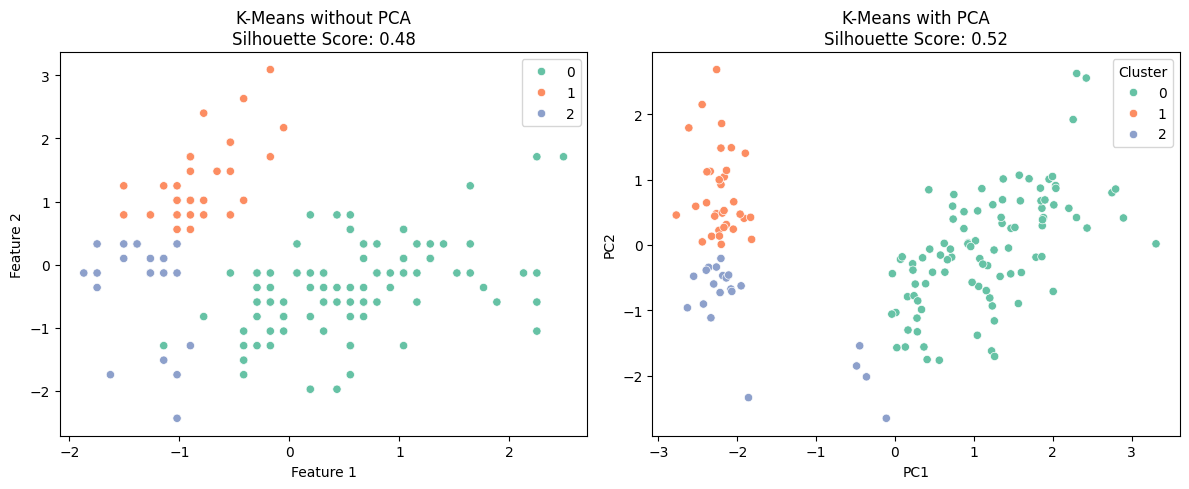

In [8]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply KMeans without PCA
kmeans_no_pca = KMeans(n_clusters=3, random_state=42)
labels_no_pca = kmeans_no_pca.fit_predict(X_scaled)
score_no_pca = silhouette_score(X_scaled, labels_no_pca)

# Step 3: Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Apply KMeans on PCA-reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)
score_pca = silhouette_score(X_pca, labels_pca)

# Step 5: Plotting both results
plt.figure(figsize=(12, 5))

# Without PCA
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_no_pca, palette="Set2")
plt.title(f"K-Means without PCA\nSilhouette Score: {score_no_pca:.2f}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# With PCA
plt.subplot(1, 2, 2)
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = labels_pca
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster", palette="Set2")
plt.title(f"K-Means with PCA\nSilhouette Score: {score_pca:.2f}")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Feature 2')

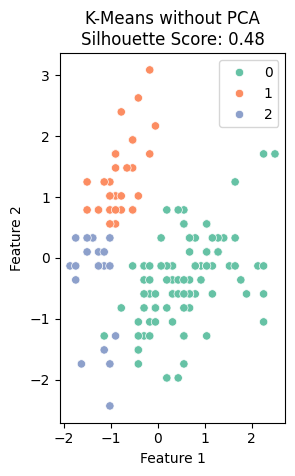

In [2]:
# Without PCA
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_no_pca, palette="Set2")
plt.title(f"K-Means without PCA\nSilhouette Score: {score_no_pca:.2f}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

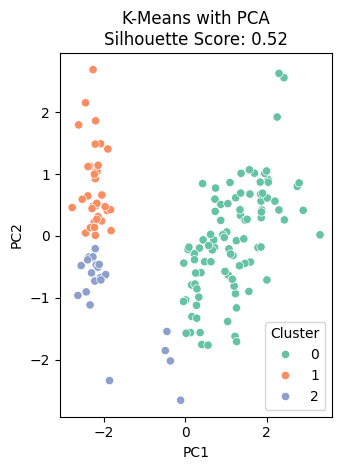

In [3]:
# With PCA
plt.subplot(1, 2, 2)
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = labels_pca
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster", palette="Set2")
plt.title(f"K-Means with PCA\nSilhouette Score: {score_pca:.2f}")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()